In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/churn_train.csv')

In [3]:
test =  pd.read_csv('data/churn_test.csv')
test.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,2.48,5.0,5.0,1.0,Winterfell,2014-01-07,Android,2014-01-06,0.0,2,True,100.0
1,10.81,5.0,5.0,1.0,Winterfell,2014-04-29,iPhone,2014-01-06,0.0,3,True,100.0
2,12.95,5.0,5.0,1.0,Astapor,2014-01-29,Android,2014-01-19,0.0,1,True,100.0
3,3.92,5.0,NaN,1.0,Winterfell,2014-02-16,iPhone,2014-01-09,0.0,0,False,0.0
4,1.46,5.0,4.5,1.0,Astapor,2014-01-09,iPhone,2014-01-07,0.0,2,False,100.0


In [4]:
df['tt_surge'] = df['surge_pct'] * df['avg_surge']
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,tt_surge
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,0.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,275.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0.0


In [5]:
city_dummy = pd.get_dummies(df['city']).rename(columns = lambda x : 'city_' + str(x))
phone_dummy = pd.get_dummies(df['phone']).rename(columns = lambda x : 'phone_' + str(x)) 
df_dummy = pd.concat([df, city_dummy, phone_dummy], axis=1)

In [6]:
df_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,tt_surge,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,0.0,1,0,0,1,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,0.0,1,0,0,1,0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,0.0,0,0,1,0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,275.0,0,0,1,1,0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0.0,0,0,1,0,1


In [7]:
df['phone'].fillna('no_phone', inplace=True)

In [8]:
df['city'].value_counts()

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64

(0, 300)

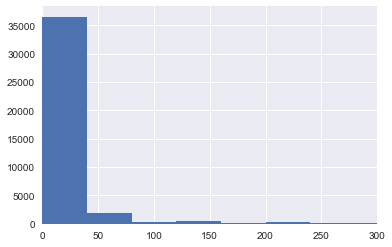

In [9]:
df['tt_surge'] .hist(bins=20)
plt.xlim(0, 300)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     40000 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
tt_surge                  40000 non-null float64
dtypes: bool(1), float64(7), int64(1), object(4)
memory usage: 3.7+ MB


In [11]:
df['phone'].value_counts()

iPhone      27628
Android     12053
no_phone      319
Name: phone, dtype: int64

In [12]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,tt_surge
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,60.874382,13.055069
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,37.089619,37.010029
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,9.130000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,800.000000


In [13]:
# change object to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     40000 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
tt_surge                  40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 3.7+ MB


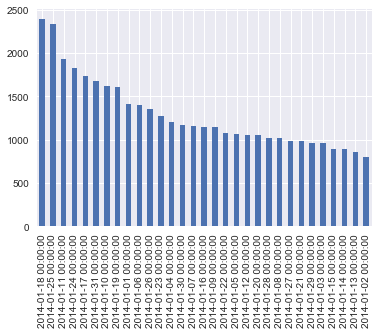

In [14]:
df['signup_date'].value_counts().plot.bar()

In [15]:
# percentage of null values
df.isnull().sum()/df.count()

avg_dist                  0.000000
avg_rating_by_driver      0.004066
avg_rating_of_driver      0.195029
avg_surge                 0.000000
city                      0.000000
last_trip_date            0.000000
phone                     0.000000
signup_date               0.000000
surge_pct                 0.000000
trips_in_first_30_days    0.000000
luxury_car_user           0.000000
weekday_pct               0.000000
tt_surge                  0.000000
dtype: float64

In [16]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       162
avg_rating_of_driver      6528
avg_surge                    0
city                         0
last_trip_date               0
phone                        0
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
tt_surge                     0
dtype: int64

(0, 80)

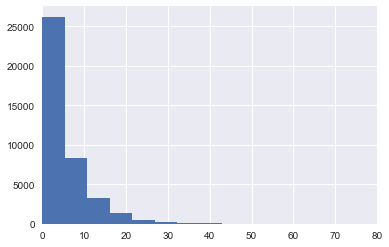

In [17]:
df['avg_dist'].hist(bins=30)
plt.xlim(0, 80)

In [18]:
df['avg_dist'].max()

160.96000000000001

In [19]:
df['avg_dist'].min()

0.0

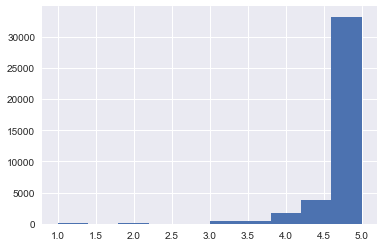

In [20]:
df['avg_rating_by_driver'].hist()

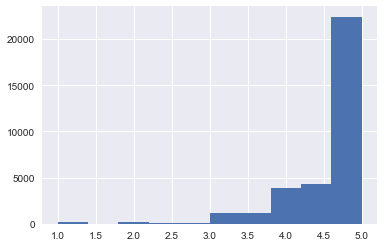

In [21]:
df['avg_rating_of_driver'].hist()

(0, 4)

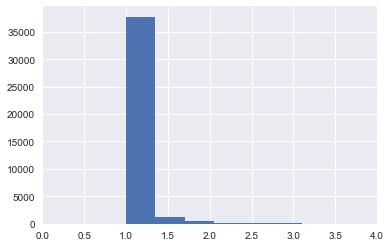

In [22]:
df['avg_surge'].hist(bins=20)
plt.xlim(0,4)

(0, 40)

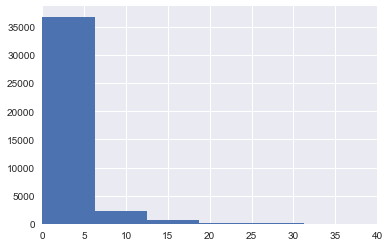

In [23]:
df['trips_in_first_30_days'].hist(bins=20)
plt.xlim(0, 40)

In [24]:
df_numeric = df[['avg_dist','avg_surge', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_of_driver','surge_pct','weekday_pct']]
df_numeric.head()

,avg_dist,avg_surge,trips_in_first_30_days,avg_rating_of_driver,avg_rating_of_driver,surge_pct,weekday_pct
0,6.94,1.00,0,5.0,5.0,0.0,100.0
1,8.06,1.00,2,5.0,5.0,0.0,0.0
2,21.50,1.00,1,NaN,NaN,0.0,100.0
3,9.46,2.75,1,NaN,NaN,100.0,100.0
4,13.77,1.00,0,NaN,NaN,0.0,100.0


In [26]:
df['churn'] = (df.last_trip_date < pd.to_datetime('2014-06-01')) * 1
df['active'] = (df.last_trip_date >= pd.to_datetime('2014-06-01')) * 1

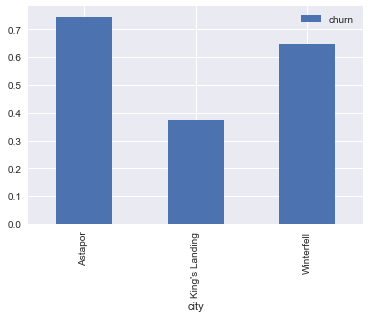

In [27]:
df[['city', 'churn']].groupby(['city']).mean().plot.bar()

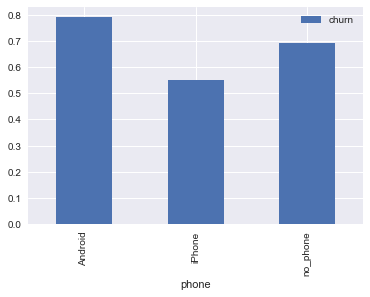

In [28]:
df[['phone', 'churn']].groupby(['phone']).mean().plot.bar()

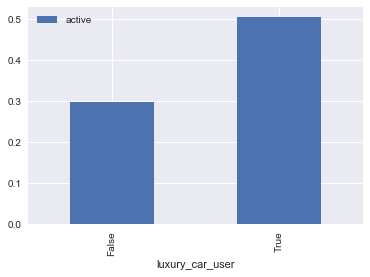

In [29]:
df[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar()

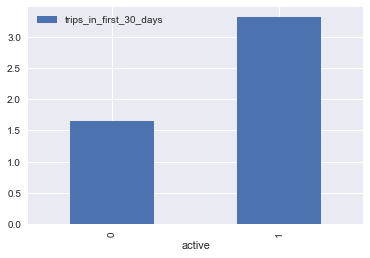

In [30]:
df[['trips_in_first_30_days', 'active']].groupby(['active']).mean().plot.bar()

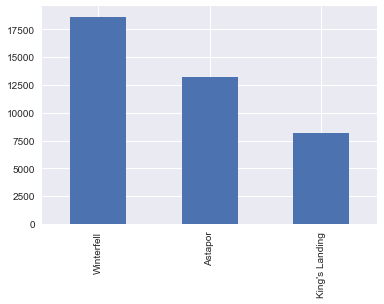

In [31]:
df['city'].value_counts().plot.bar()

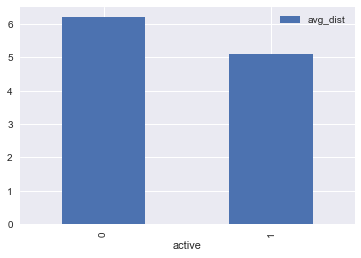

In [32]:
df[['avg_dist', 'active']].groupby(['active']).mean().plot.bar()